<a href="https://colab.research.google.com/github/shriver42/ESAA/blob/%ED%95%84%EC%82%AC-%EA%B3%BC%EC%A0%9C/0930_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **파이썬 머신러닝 완벽 가이드 8장**

p.534-538, p.550-565



## **06. 토픽 모델링(Topic Modeling) — 20 뉴스그룹**

-토픽 모델링: 문서 집합에 숨어 있는 주제를 찾아내는 것
  - LSA(Latent Semantic Analysis)
  - LDA(Latent Dirichlet Allocation): LatentDirichletAllocation 클 래스

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#모터사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제를 추출.
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med'] #Fixed typo in category name

#위에서 cats 변수로 기재된 카테고리만 추출. featch_20newsgroups( )의 categories에 cats 입력
news_df= fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'),categories=cats, random_state=0)

#LDA는 Count 기반의 벡터화만 적용합니다.
count_vect = CountVectorizer(max_df=0.95, max_features=100, min_df=2, stop_words='english', ngram_range=(1, 2))

feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:',feat_vect.shape)

CountVectorizer Shape: (7862, 100)


In [ ]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

- LatentDirichletAllocation.fit(데이터 세트)을 수행하면 LatentDirichletAllocation 객체는 components_ 속성값을 가지게 됨.
- components_ : 개별 토픽별로 각 word 피처가 얼마나 많 이 그 토픽에 할당됐는지에 대한 수치를 가지고 있음. 높은 값일수록 해당 word 피처는 그 토픽의 중심 word가 됨.

In [ ]:
print(lda.components_.shape)
lda.components_

(8, 100)


array([[5.41235723e+02, 4.19819341e+02, 1.00412490e+03, 8.26124846e+02,
        4.91353512e+00, 4.59805499e+01, 4.17485663e-01, 1.20833316e+01,
        4.48893150e+00, 1.25037326e-01, 1.16532717e+02, 5.20432680e+01,
        1.25098033e-01, 1.25110856e-01, 1.25033053e-01, 3.78815911e+01,
        4.73430735e+01, 5.47846367e-01, 9.58358074e+01, 1.41511360e+02,
        2.21996541e+00, 1.20452586e+01, 1.25068759e-01, 2.14911815e+01,
        1.28727744e-01, 9.17270945e+00, 1.25005602e-01, 1.77274683e+00,
        1.25682144e+02, 9.80351004e+00, 4.46102338e+00, 1.25007050e-01,
        1.25034750e-01, 1.80724465e+01, 1.57307829e+00, 7.41791075e+00,
        1.25014613e-01, 1.71752655e+02, 5.33203835e+01, 1.25064100e-01,
        1.01911856e+02, 1.65894752e-01, 1.25037738e-01, 2.79999619e+02,
        1.25000001e-01, 3.99979596e+01, 3.46184560e+00, 6.95965505e+01,
        9.84659825e+01, 1.87005802e+01, 4.08652934e-01, 2.99597778e+01,
        7.40850452e+00, 1.03927061e+02, 2.20563130e+01, 4.014930

- display_topics() 함수를 만들어서 각 토픽별로 연관도가 높은 순으로 Word를 나열하기

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)

        #components, array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환.
        topic_word_indexes = topic.argsort()[:: -1 ]
        top_indexes=topic_word_indexes[:no_top_words]

        #top_indexes대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)

#CountVectorizer 객체 내의 전체 word의 명칭을 get_feature_names_out( )를 통해 추출
feature_names = count_vect.get_feature_names_out()

#토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
armenian armenians turkish people 10 said new 12 years year number world jews university time
Topic # 1
people know say don think said did israel just believe like church right time way
Topic # 2
thanks does know help information need like use using mail want program work question problem
Topic # 3
image jpeg file color files bit display use version program software don available graphics read
Topic # 4
just don like good time ve think use make better really used year problem way
Topic # 5
edu com available graphics ftp data server mail information based version software file use subject
Topic # 6
windows dos list university software version window server graphics run color display ve new mail
Topic # 7
god window use jesus file program set read subject line make number does case way


- Topic #0: 일부 불분명한 주제어들이 있지만 주로 의학에 관련된 주제어가 추출됨.
- Topic #1: 명확하지 않고 일반적인 단어가 주를 이루고 있음.
- Topic #2: 컴퓨터 그래픽스 영역의 주제어가 다수 포함됨.

- Topic #3: 일반적인 단어로 주제어가 추출됨.

- Topic #4: 명확하게 중동 영역의 주제어가 추출됨.
- Topic #5: 일부 컴퓨터 그래픽스 영역의 주제어를 포함하고 있지만, 전반적인 컴퓨터 관련 용어들을 가지고 있어서 8개 토픽 중 하나로 매핑하기는 어려움.
- Topic #6: 명확하게 기독교 관련 주제어가 추출됨.
- Topic #7: 윈도우 운영체제와 관련된 주제어가 추출됨.

## **08. 문서 유사도**

**문서 유사도 측정 방법 - 코사인 유사도**
- 코사인 유사도는 두 벡터 사이의 사잇각을 구해서 얼마나 유사한지 수치로 적용한 것

**두 벡터 사잇각**
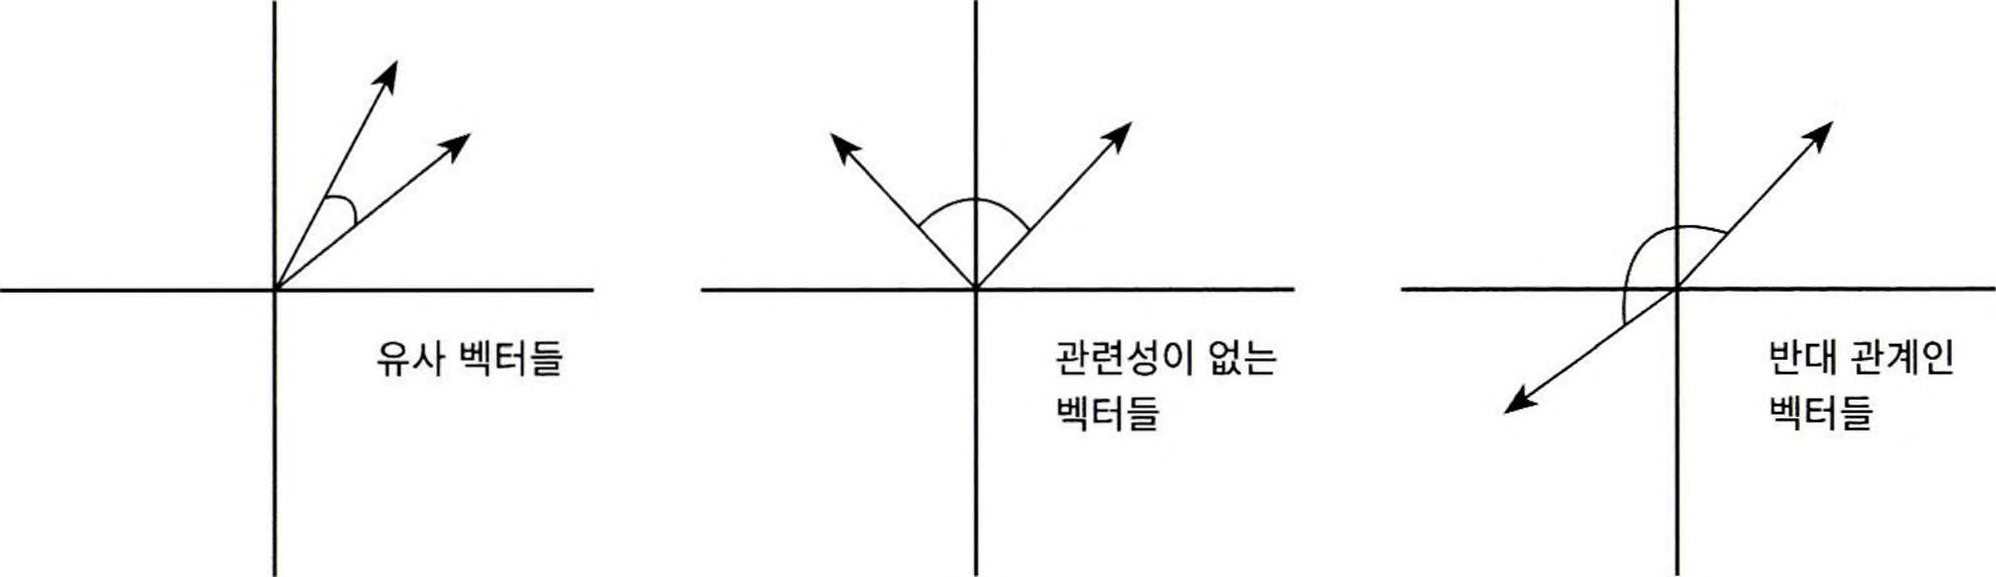

In [ ]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm

    return similarity

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [ ]:
#TFidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환.
feature_vect_dense = feature_vect_simple.todense()

#첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )

#첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2 )
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


In [ ]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect1, vect3 )
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect2, vect3)
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.360
문장 2, 문장 3 Cosine 유사도: 0.372


- 코사인 유사도 측정
  - cosine_similarity()는 희소 행렬, 밀집 행렬 모두가 가능하며, 행렬 또는 배열 모두 가능

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.36013824]]


- 첫 번째 유사도 값인 1은 비교 기준인 첫 번째 문서 자신에 대한 유사도 측정
- 두 번째 유사도 값은 번째 문서와 두 번째 문서의 유사도
- 세번째 값: 첫 번째 문서와 세 번째 문서의 유사도

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.36013824]]


- cosine_similarity()는 쌍으로(pair) 코사인 유사도 값을 제공할 수 있음.

In [ ]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.40207758 0.36013824]
 [0.40207758 1.         0.3716459 ]
 [0.36013824 0.3716459  1.        ]]
shape: (3, 3)


**Opinion Review 데이터 세트를 이용한 문서 유사도 측정**

In [ ]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'/content/drive/MyDrive/ESAA/topics'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split(',')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion.text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1 , 2), min_df=0.05, max_df=0.85)

feature_vect = tfidf_vect.fit_transform(document_df['opinion.text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

#clusterjab인=2인 데이터는 호텔로 군집화된 데이터임. DataFrame에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label']==2] .index
print('호텔로 클러스터링 된 문서들의 DataFrame Index： ', hotel_indexes)

#호텔로 군집화된 데이터 중 첫 번째 문서를 추출해 파일명 표시.
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명', comparison_docname, ' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정'''

similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index：  Index([18, 20, 24, 25, 30, 31, 32, 38, 39, 42, 43, 45, 47, 50], dtype='int64')
##### 비교 기준 문서명 /content/drive/MyDrive/24-2 ESAA/topics/staff_swissotel_chicago.txt.data  와 타 문서 유사도######
[[1.         0.12946139 0.12559413 0.24093012 0.18678668 0.22696926
  0.27003062 0.15717615 0.9379169  0.06163352 0.06489259 0.24949927
  0.06183228 0.25737407]]


가장 유사도가 큰 파일명 및 유사도:
 filename      /content/drive/MyDrive/24-2 ESAA/topics/staff_bestwestern_hotel_sfo.txt.data
similarity                                                                        0.937917
Name: 39, dtype: object


Text(0.5, 1.0, '/content/drive/MyDrive/24-2 ESAA/topics/staff_swissotel_chicago.txt.data')

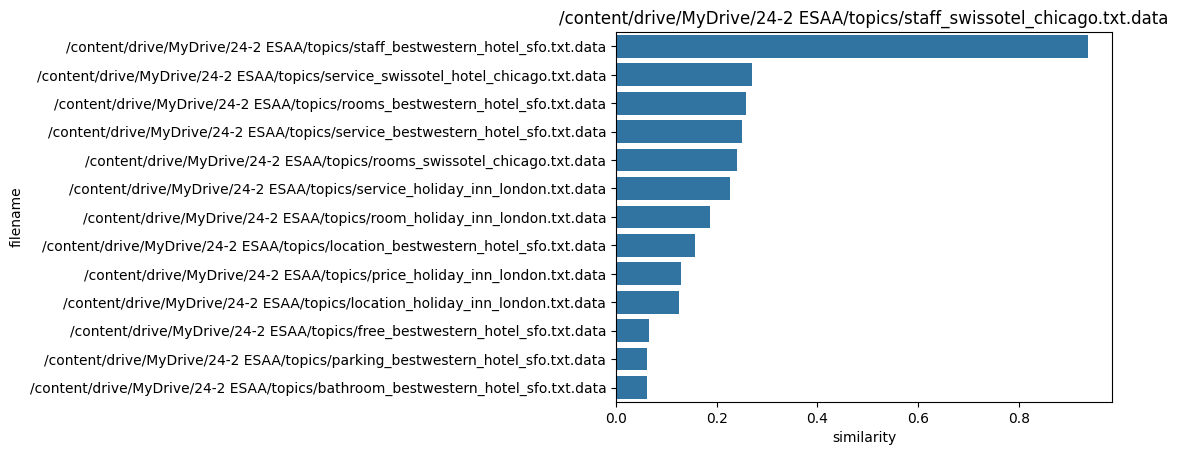

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as pit
%matplotlib inline

#첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 추출하되 자기 자신은 제외.
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1 :]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재정렬.
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1 ]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value
print('가장 유사도가 큰 파일명 및 유사도:\n', hotel_1_sim_df.iloc[0, :])

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
pit.title(comparison_docname)

## **09. 한글 텍스트 처리 - 네이버 영화 평점 감성 분석**

**한글 NLP 처리의 어려움**
- 띄어쓰기, 다양한 조사

**KoNLPy 소개**
- KoNLPy: 한글 형태소 패키지


In [ ]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 27.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
train_df = pd.read_csv('/content/drive/MyDrive/24-2 ESAA/ratings_train.txt', sep='\t', encoding='utf-8') #코드 오류 수정
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [ ]:
train_df['label'].value_counts( )

,count
label,
0,75173
1,74827


In [ ]:
import re

train_df = train_df.fillna(' ')
#정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미함.)
train_df['document'] = train_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )

#테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('/content/drive/MyDrive/24-2 ESAA/ratings_test.txt', sep='\t', encoding='utf-8')
test_df['document'] = test_df['document'].astype(str).apply(lambda x: re.sub(r"\d+", " ", x))

#id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

In [ ]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
#입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
    tokens_ko = twitter.morphs(text)
    return tokens_ko

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Twitter 객체의 morphs( ) 객체를 이용한 tokenizer를 사용. ngram_range는 (1, 2)
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1, 2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

In [ ]:
#로지스틱 회귀를 이용해 감성 분석 분류 수행.
lg_clf = LogisticRegression(random_state=0, solver='liblinear')

#파라미터 C 최적화를 위해 GridSearchCV를 이용.
params = { 'C' : [1, 3.5, 4.5, 5.5, 10] }
grid_cv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 3.5} 0.8593


In [ ]:
from sklearn.metrics import accuracy_score

#학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환함.
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

#classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)
print ('Logistic Regression 정확도:', accuracy_score(test_df ['label'], preds))

Logistic Regression 정확도: 0.86172
